Iniciamos importando las bibliotecas necesarias. importando el archivo csv que usaremos y mostrando  info de dicho dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

dataframe = pd.read_csv("spotify-2023.csv", encoding="latin1")
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

Ahora eliminamos los datos duplicados (en caso de que haya).
Borramos los que tengan datos faltantes para que no presenten problemas.
Y convertimos las columnas "streams, in_deezer_playlists, in_shazam_charts" en valores numéricos. Ya que streams no era detectada como un dato numérico por ser muy largo, y en el caso de las otras 2 al tener comas ',' eran detectadas como texto

In [2]:
# Eliminar duplicados
dataframe = dataframe.drop_duplicates()
# Borramos los que tangan datos faltantes
dataframe = dataframe.dropna(thresh=len(dataframe.columns))

# Convertimos algunas columnas a su valor numérico
dataframe['streams'] = pd.to_numeric(dataframe['streams'], errors='coerce')
dataframe['in_deezer_playlists'] = pd.to_numeric(dataframe['in_deezer_playlists'].astype(str).str.replace(',', ''), errors='coerce')
dataframe['in_shazam_charts'] = pd.to_numeric(dataframe['in_shazam_charts'].astype(str).str.replace(',', ''), errors='coerce')

Ahora vemos la varianza de los diferentes datos numéricos. Los cuales englobamos en "numeric_column"

In [3]:
numeric_column = dataframe.select_dtypes(include=['float64', 'int64']).columns
# Calculamos la varianza solo en las columnas numéricas
variance = dataframe[numeric_column].var()
print(variance)

artist_count            7.677449e-01
released_year           1.172730e+02
released_month          1.276314e+01
released_day            8.648373e+01
in_spotify_playlists    5.992504e+07
in_spotify_charts       3.466176e+02
streams                 2.736616e+17
in_apple_playlists      5.613545e+03
in_apple_charts         2.457230e+03
in_deezer_playlists     1.338887e+06
in_deezer_charts        2.912787e+01
in_shazam_charts        2.357312e+04
bpm                     7.938195e+02
danceability_%          2.157508e+02
valence_%               5.579506e+02
energy_%                2.594544e+02
acousticness_%          6.487704e+02
instrumentalness_%      7.686605e+01
liveness_%              1.833856e+02
speechiness_%           1.044481e+02
dtype: float64


Ahora normalizamos las columnas que contengan valores numéricos

In [4]:
scaler = StandardScaler()
dataframe[numeric_column] = scaler.fit_transform(dataframe[numeric_column])
dataframe[numeric_column]

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,0.493412,0.419697,0.274941,0.032661,-0.555414,7.270551,-0.626626,-0.229195,4.310171,-0.282485,1.399470,5.008088,0.086461,0.858909,1.601170,1.157785,0.184257,-0.191380,-0.751377,-0.638975
1,-0.648565,0.419697,-0.845392,1.001031,-0.436366,1.949764,-0.641288,-0.162419,1.544735,-0.271244,2.141073,2.114475,-1.085516,0.245808,0.415057,0.598699,-0.758569,-0.191380,-0.603597,-0.638975
2,-0.648565,0.419697,-0.005142,1.754207,-0.446319,5.443210,-0.629262,0.451916,3.179773,-0.242707,2.141073,5.809696,0.548148,-1.116640,-0.813418,-0.705833,-0.365725,-0.191380,0.948084,-0.443160
3,-0.648565,0.050101,0.555024,1.001031,0.388825,4.744521,0.634757,0.745728,3.179773,-0.213305,1.770271,3.196321,1.684611,-0.844150,0.287973,0.474458,-0.601432,-0.191380,-0.529708,0.438007
4,-0.648565,0.419697,-0.285226,0.463048,-0.221925,2.057255,-0.317038,0.318365,1.686034,-0.246166,2.326474,2.394712,0.761235,-0.162927,-1.194668,0.971423,-0.483578,6.998791,-0.529708,-0.443160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,-0.648565,0.327298,1.395274,-1.150902,-0.503710,-0.630011,-0.722089,0.011197,-0.736246,-0.289403,-0.269138,-0.375075,0.761235,-0.503539,-1.152307,-1.575521,1.205652,-0.191380,-0.751377,-0.736882
949,-0.648565,0.327298,1.115191,0.785837,-0.474368,-0.630011,-0.663944,-0.750044,-0.998659,-0.314481,-0.454538,-0.375075,1.542553,-1.729741,-1.872447,-2.507329,2.227047,-0.077251,-0.455818,-0.443160
950,0.493412,0.327298,1.395274,-1.150902,-0.552829,-0.630011,-0.756441,-0.776754,-0.998659,-0.315346,-0.454538,-0.375075,-1.085516,0.858909,1.262280,0.163855,-0.876423,-0.191380,-0.751377,-0.443160
951,1.635390,0.327298,1.115191,0.678241,-0.456272,-0.630011,-0.640945,-0.416166,-0.473832,-0.306699,-0.454538,-0.375075,-0.907944,0.995154,0.669224,0.785061,-0.719285,-0.191380,-0.455818,-0.541067


Y calculamos su varianza, la cual comprobamos que ya ha sido normalizada.

In [5]:
# Calculamos la varianza solo en las columnas numéricas
variance = dataframe[numeric_column].var()
print(variance)

artist_count            1.001225
released_year           1.001225
released_month          1.001225
released_day            1.001225
in_spotify_playlists    1.001225
in_spotify_charts       1.001225
streams                 1.001227
in_apple_playlists      1.001225
in_apple_charts         1.001225
in_deezer_playlists     1.001225
in_deezer_charts        1.001225
in_shazam_charts        1.001225
bpm                     1.001225
danceability_%          1.001225
valence_%               1.001225
energy_%                1.001225
acousticness_%          1.001225
instrumentalness_%      1.001225
liveness_%              1.001225
speechiness_%           1.001225
dtype: float64


Juntamos, transformamos y mostramos los datos categóricos

In [6]:
cat_columns = dataframe.select_dtypes(include='O').columns
#cat_columns = 
label_encoder = LabelEncoder()

for column in cat_columns:
    dataframe[column] = label_encoder.fit_transform(dataframe[column])

dataframe

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,590,285,0.493412,0.419697,0.274941,0.032661,-0.555414,7.270551,-0.626626,-0.229195,...,0.086461,2,0,0.858909,1.601170,1.157785,0.184257,-0.191380,-0.751377,-0.638975
1,342,354,-0.648565,0.419697,-0.845392,1.001031,-0.436366,1.949764,-0.641288,-0.162419,...,-1.085516,3,0,0.245808,0.415057,0.598699,-0.758569,-0.191380,-0.603597,-0.638975
2,805,381,-0.648565,0.419697,-0.005142,1.754207,-0.446319,5.443210,-0.629262,0.451916,...,0.548148,7,0,-1.116640,-0.813418,-0.705833,-0.365725,-0.191380,0.948084,-0.443160
3,146,491,-0.648565,0.050101,0.555024,1.001031,0.388825,4.744521,0.634757,0.745728,...,1.684611,0,0,-0.844150,0.287973,0.474458,-0.601432,-0.191380,-0.529708,0.438007
4,746,37,-0.648565,0.419697,-0.285226,0.463048,-0.221925,2.057255,-0.317038,0.318365,...,0.761235,0,1,-0.162927,-1.194668,0.971423,-0.483578,6.998791,-0.529708,-0.443160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,450,455,-0.648565,0.327298,1.395274,-1.150902,-0.503710,-0.630011,-0.722089,0.011197,...,0.761235,0,0,-0.503539,-1.152307,-1.575521,1.205652,-0.191380,-0.751377,-0.736882
949,81,491,-0.648565,0.327298,1.115191,0.785837,-0.474368,-0.630011,-0.663944,-0.750044,...,1.542553,8,0,-1.729741,-1.872447,-2.507329,2.227047,-0.077251,-0.455818,-0.443160
950,11,157,0.493412,0.327298,1.395274,-1.150902,-0.552829,-0.630011,-0.756441,-0.776754,...,-1.085516,3,0,0.858909,1.262280,0.163855,-0.876423,-0.191380,-0.751377,-0.443160
951,204,158,1.635390,0.327298,1.115191,0.678241,-0.456272,-0.630011,-0.640945,-0.416166,...,-0.907944,3,0,0.995154,0.669224,0.785061,-0.719285,-0.191380,-0.455818,-0.541067


Creamos una matriz de correlacion

<AxesSubplot:>

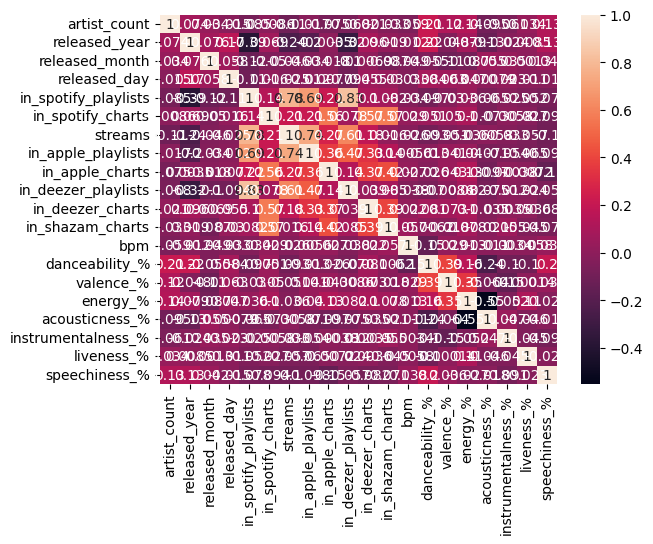

In [ ]:
numerical_column = ['artist_count', 'released_year', 'released_month', 'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
matriz = dataframe[numerical_column].corr()
sns.heatmap(matriz,annot=True)

De estos, revisando la fila de "streams", selecciono las columnas que tienen colores más claros y oscuro para revisarlas más detalladamente

<AxesSubplot:>

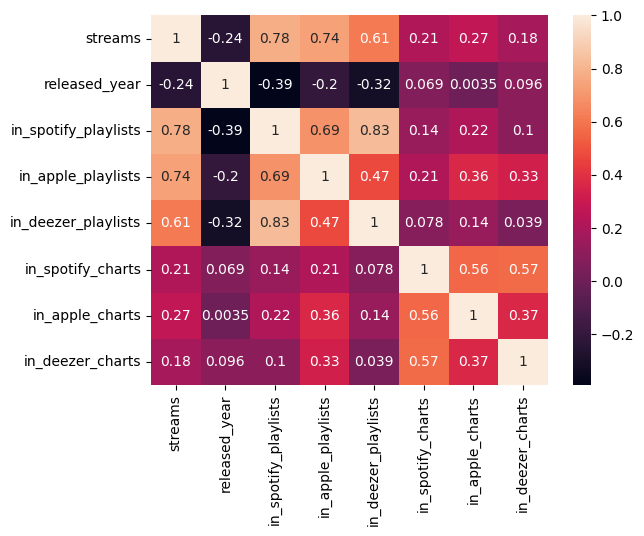

In [8]:
most_influential_variables = ['streams', 'released_year', 'in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists', 'in_spotify_charts', 'in_apple_charts', 'in_deezer_charts']
matriz = dataframe[most_influential_variables].corr()

sns.heatmap(matriz,annot=True)

Entrenamos el modelo con las variables más influyentes, se hizo una prueba solo con las categorías que tenían una correlación mayor a 0.5, pero los resultados fueron ligeramente peores que se apartaron en el segmento anterior

In [9]:
X = dataframe[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists', 'released_year', 'in_spotify_charts', 'in_apple_charts', 'in_deezer_charts']]
Y = dataframe['streams']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

print(f"X_train: {X_train}")
print(f"X_test: {X_test}")
print(f"Y_train: {Y_train}")
print(f"Y_test: {Y_test}")


X_train:      in_spotify_playlists  in_apple_playlists  in_deezer_playlists  \
337             -0.548822           -0.509652            -0.321399   
355             -0.590443           -0.723333            -0.321399   
25              -0.594580           -0.589782            -0.312752   
765             -0.028812           -0.295970            -0.293727   
764              0.539154            2.428472            -0.086186   
..                    ...                 ...                  ...   
892             -0.558775           -0.669913            -0.318805   
224             -0.097448            0.772438            -0.197739   
746             -0.538223           -0.656558            -0.311022   
667             -0.493240           -0.549717            -0.311022   
804             -0.377553           -0.776754            -0.317940   

     released_year  in_spotify_charts  in_apple_charts  in_deezer_charts  
337       0.419697          -0.307539         1.040093         -0.454538  


Ahora creamos el modelo de regresión lineal y lo entrenamos

In [10]:
# Crear el modelo de regresión lineal
model = LinearRegression() # Esta funcion crea un objeto modelo de regresion lineal

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, Y_train) # Ajusta el modelo a los datos de entrenamiento, encontrando los mejores valores para los coeficientes e intercepto de la ecuación de la regresión.

LinearRegression()

Ahora, a partir de un error donde a Y_test le faltaba un dato, decidí eliminarlo y ajustar su respectivo X.

In [11]:
Y_test = Y_test.dropna()  # Elimina los NaN en y_test
X_test = X_test.loc[Y_test.index]  # Nos aseguramos de mantener índices consistentes
# Revisamos si hay valores faltantes en X_test y Y_test
print(X_test.isnull().sum())  # Cantidad de NaN en cada columna de X_test
print()
print(Y_test.isnull().sum())  # Cantidad de NaN en y_test

in_spotify_playlists    0
in_apple_playlists      0
in_deezer_playlists     0
released_year           0
in_spotify_charts       0
in_apple_charts         0
in_deezer_charts        0
dtype: int64

0


Ahora evaluamos el modelo con diferentes métricas

In [12]:
y_pred = model.predict(X_test)
#y_pred

mse = mean_squared_error(Y_test, y_pred)
print(f"Error cuadrático medio:   {mse}")

r2 = r2_score(Y_test, y_pred)
print(f"R^2: {r2}")

Error cuadrático medio:   0.29193562408355034
R^2: 0.7034647794826624


Para finalizar graficamos, en este caso comparamos los datos predichos (eje y) con los reales (eje x)

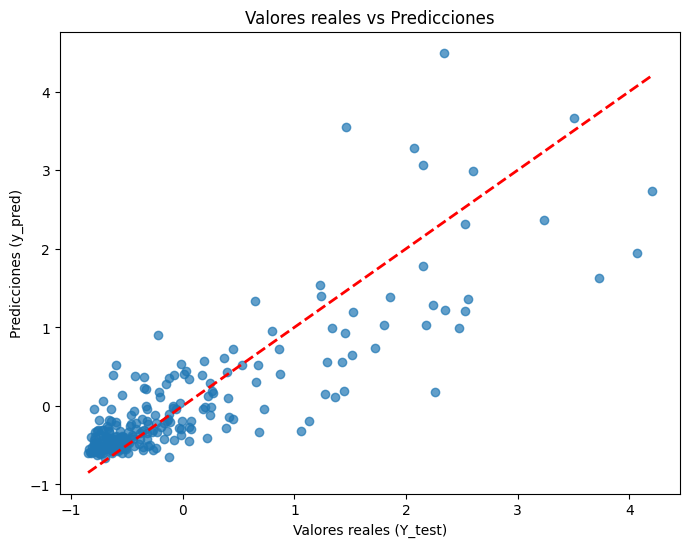

In [15]:
# Comparar los valores reales vs. predichos
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, y_pred, alpha=0.7)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.xlabel("Valores reales (Y_test)")
plt.ylabel("Predicciones (y_pred)")
plt.title("Valores reales vs Predicciones")
plt.show()